Check the result

In [62]:
import pandas as pd
question_df = pd.read_json("eval_result_11_29.json", lines=True)

In [8]:
observe_df = question_df.drop(['first_session_dialogue', 'second_session_dialogue', 'third_session_dialogue', 'fourth_session_dialogue', 'fifth_session_dialogue'], axis=1)
print(observe_df['short_score'].astype(int).sum()/500)
print(observe_df['long_score'].astype(int).sum()/500)
print(observe_df['long_recall_score'].astype(int).sum()/500)
print(observe_df['base_dialog_score'].astype(int).sum()/500)
print(observe_df['base_paragraph_score'].astype(int).sum()/500)

7.794
9.03
9.254
7.746
6.648


In [65]:
question_df_k2 = pd.read_json("eval_result_12_03_k2.json", lines=True)
observe_df = question_df_k2.drop(['first_session_dialogue', 'second_session_dialogue', 'third_session_dialogue', 'fourth_session_dialogue', 'fifth_session_dialogue'], axis=1)[:50]
print(observe_df['short_score'].astype(int).sum()/50)
print(observe_df['long_score'].astype(int).sum()/50)
print(observe_df['long_recall_score'].astype(int).sum()/50)
print(observe_df['base_dialog_score'].astype(int).sum()/50)
print(observe_df['base_paragraph_score'].astype(int).sum()/50)

7.16
8.72
9.18
7.04
6.22


In [9]:
# 低於 score 的數量
score = 5
print((question_df['short_score'].astype(int) < score).sum())
print((question_df['long_score'].astype(int) < score).sum())
print((question_df['long_recall_score'].astype(int) < score).sum())
print((question_df['base_dialog_score'].astype(int) < score).sum())
print((question_df['base_paragraph_score'].astype(int) < score).sum())

6
4
4
2
7


In [10]:
# 中位數
print((question_df['short_score'].astype(int).median()))
print((question_df['long_score'].astype(int).median()))
print((question_df['long_recall_score'].astype(int).median()))
print((question_df['base_dialog_score'].astype(int).median()))
print((question_df['base_paragraph_score'].astype(int).median()))

8.0
9.0
10.0
8.0
7.0


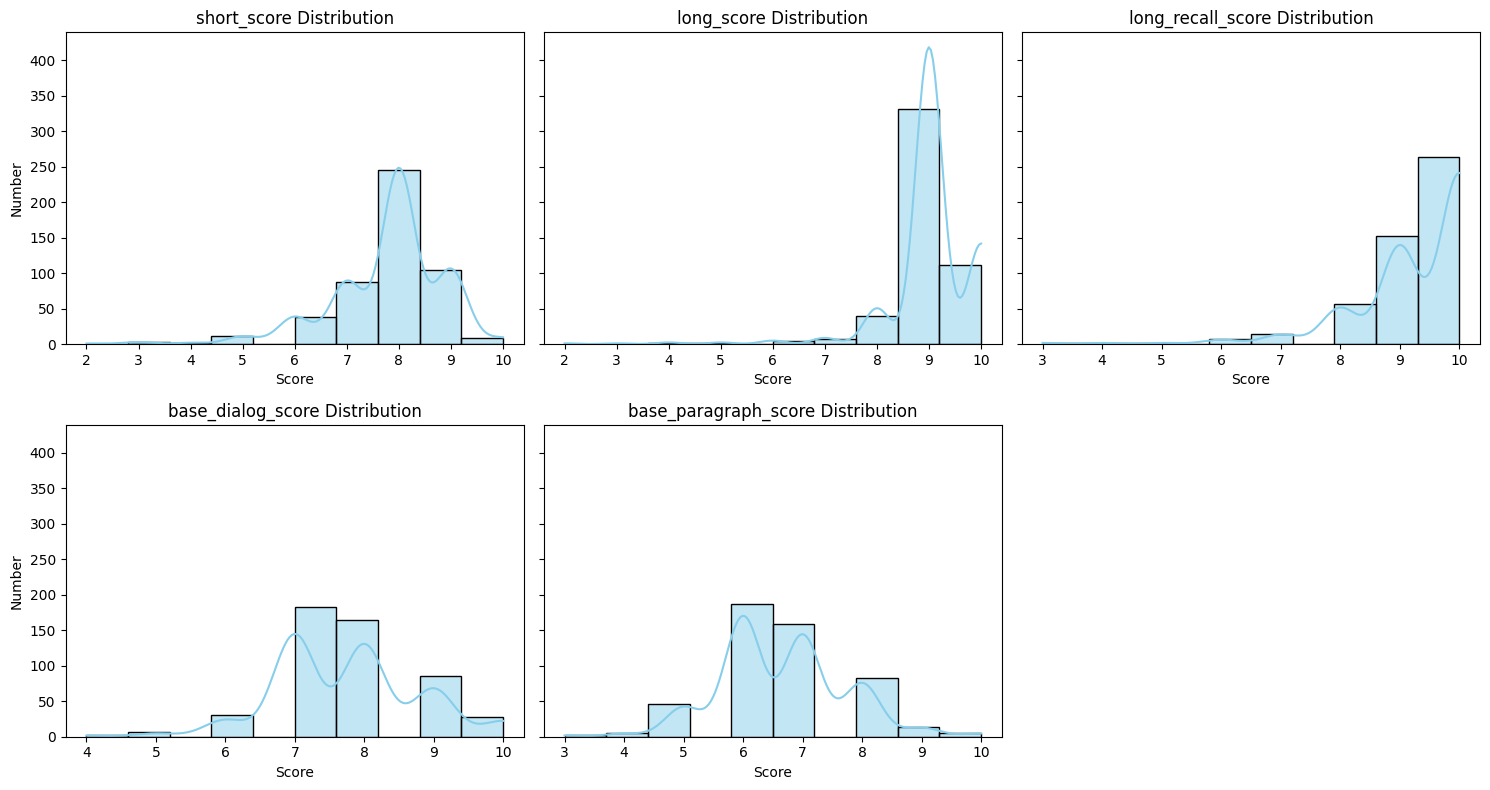

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharey=True)

axes = axes.flatten()

for i, column in enumerate(columns):
    data = question_df[column].astype(int)
    sns.histplot(data, bins=10, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel("Score")
    axes[i].set_ylabel("Number")
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i]) 

plt.tight_layout()
plt.show()


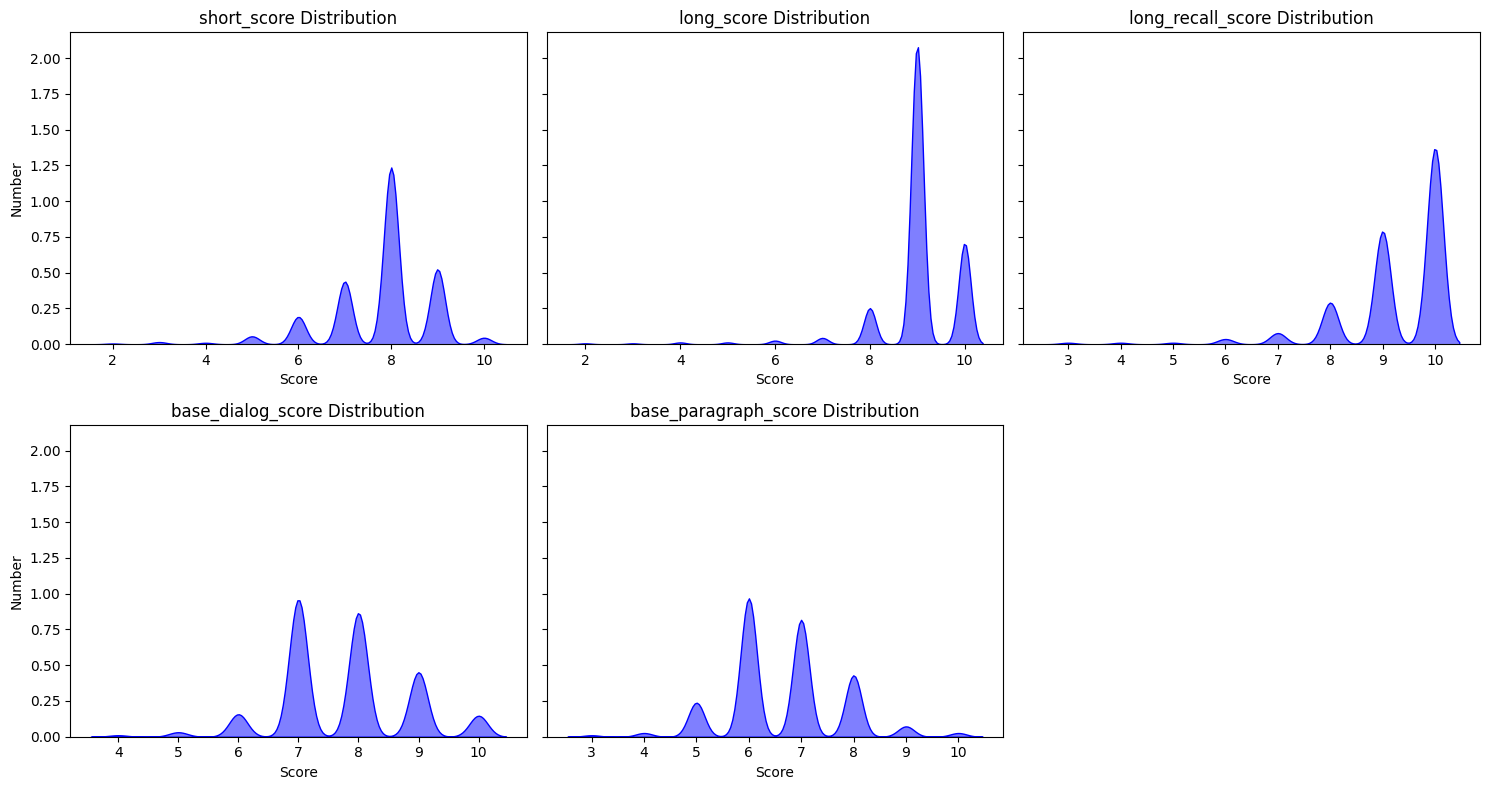

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharey=True)

axes = axes.flatten()

for i, column in enumerate(columns):
    data = question_df[column].astype(int)
    sns.kdeplot(data, color='blue', fill=True, alpha=0.5, bw_adjust=0.5, ax=axes[i])
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel("Score")
    axes[i].set_ylabel("Number")
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i]) 

plt.tight_layout()
plt.show()


In [33]:
import json

index = 2
print(f"Question: {question_df['question'][index]}")
print(f"Short memory: {question_df['short_score'][index]}")
print(json.dumps(eval(question_df['short_mem_result'][index]), indent=4, ensure_ascii=True))
print(f"\n\nLong memory: {question_df['long_score'][index]}")
print(json.dumps(eval(question_df['long_mem_result'][index]), indent=4, ensure_ascii=True))
print(f"\n\nLong recall memory: {question_df['long_recall_score'][index]}")
print(json.dumps(eval(question_df['long_mem_recall_result'][index]), indent=4, ensure_ascii=True))

Question: {'user': "It's been a while since our last family hike. Do you remember what fruit we found during our last adventure?", 'assistant': 'We found some delicious berries while we were exploring!'}
Short memory: 7
{
    "retrieve_memory": [
        {
            "text": "user:Today's hike was so much fun! I loved exploring the woods with you and the kids., assistant:Yeah, it was awesome! I loved climbing the trees and finding all the berries.",
            "time": "10/06 12:01"
        },
        {
            "text": "user:Thanks, sweetie. I think it's important to keep learning and expanding your knowledge., assistant:I agree. Remember when we went on that hike a couple of years ago and you taught us about all the different plants and animals we saw?",
            "time": "10/06 12:03"
        },
        {
            "text": "user:We used to go on hikes and explore the woods together. It was always so much fun., assistant:Like the time we went hiking and picked berries?",
    

In [25]:
question_df.head()

,dataID,first_session_dialogue,second_session_dialogue,third_session_dialogue,fourth_session_dialogue,fifth_session_dialogue,time_interval,question,short_mem_result,long_mem_result,long_mem_recall_result,base_dialog,base_paragraph,short_score,long_score,long_recall_score,base_dialog_score,base_paragraph_score
0,episode-15761,"[{'user': 'Hi there, how are you doing today?'...",[{'user': 'That looks like an interesting book...,"[{'user': 'Hey there, did you see me riding my...","[{'user': ""It's nice to be back in the neighbo...","[{'user': ""Ugh, my boss keeps calling me on my...","[Now, A few months before, A few hours before,...",{'user': 'What was it that you needed help wit...,{'retrieve_memory': [{'text': 'user:Speaking o...,{'closest_summary': {'text': 'User helped assi...,"{'search times': 1, 'used queries': ['user:Wha...",{'retrieve_memory': [{'text': 'user:Speaking o...,"{'retrieve_memory': [{'text': '[""user:Hi there...",8,9,9,7,6
1,episode-15776,"[{'user': 'Hey, B. Can I talk to you about som...","[{'user': 'Hey, I have some exciting news to s...","[{'user': 'Hey, did I tell you about my bike r...",[{'user': 'I moved in with my grandparents whe...,"[{'user': ""I just can't believe my grandson is...","[Now, A couple of years before, A few days bef...",{'user': 'Do you remember when I shared my big...,"{'retrieve_memory': [{'text': ""user:I got acce...",{'closest_summary': {'text': 'User got accepte...,"{'search times': 1, 'used queries': ['user:Do ...","{'retrieve_memory': [{'text': ""user:I got acce...","{'retrieve_memory': [{'text': '[""user:I got ac...",8,9,10,7,6
2,episode-15784,"[{'user': ""I'm so sick of having to take out t...","[{'user': ""Today's hike was so much fun! I lov...","[{'user': "" I'm just so sick of taking out the...","[{'user': 'Today was amazing, I won the contes...","[{'user': 'When I was ten, I moved in with my ...","[Now, A couple of years before, A few days bef...","{'user': ""It's been a while since our last fam...","{'retrieve_memory': [{'text': ""user:Today's hi...",{'closest_summary': {'text': 'User and assista...,"{'search times': 4, 'used queries': [""user:It'...",{'retrieve_memory': [{'text': 'user:We used to...,"{'retrieve_memory': [{'text': ""['user:We used ...",7,8,6,9,5
3,episode-15787,"[{'user': ""Hey there, Classmates B! What's up?...","[{'user': 'Hey, have you ever witnessed a car ...","[{'user': ""I'm almost done with my work for to...","[{'user': 'You know, I still get emotional thi...","[{'user': 'Hey, what are you reading there?', ...","[Now, A few days before, A few days before, A ...","{'user': ""A few days ago, you mentioned that I...","{'retrieve_memory': [{'text': ""user:Thank you ...",{'closest_summary': {'text': 'Classmates A and...,"{'search times': 1, 'used queries': [""user:A f...","{'retrieve_memory': [{'text': ""user:Thank you ...","{'retrieve_memory': [{'text': '[""user:Hey ther...",6,9,8,5,4
4,episode-15790,"[{'user': ""Hey, how's your day going so far?"",...","[{'user': 'Hey.', 'assistant': 'Hey, everythin...","[{'user': ""I can't stop thinking about the Gra...","[{'user': ""I don't know where the chips went. ...","[{'user': 'Hey, have you seen the book I was l...","[Now, A few months before, A few months before...",{'user': 'Do you remember when we talked about...,"{'retrieve_memory': [{'text': ""user:I'm glad y...","{'closest_summary': {'text': ""User and assista...","{'search times': 1, 'used queries': ['user:Do ...","{'retrieve_memory': [{'text': 'user:Yeah, I re...",{'retrieve_memory': [{'text': '[\'user:The one...,7,10,9,6,5


In [32]:
index=3
print(json.dumps(eval(question_df['long_mem_recall_result'][index]), indent=4, ensure_ascii=True))

{
    "search times": 1,
    "used queries": [
        "user:A few days ago, you mentioned that I hadn't been hanging out with you all. What was the reason you brought that up?"
    ],
    "searched memory": [
        {
            "text": "Classmates A and B discussed their relationship. Classmates A apologized for hurtful comments and agreed to be more considerate.",
            "time": "2024/11/20 14:01"
        }
    ],
    "thought": "The previous discussion highlighted Classmates A's hurtful comments and Classmates B's discomfort, leading to an apology and a commitment to be more considerate. This provides context for why user wasn't hanging out.",
    "evidence": [
        "Classmates A and B discussed their relationship. Classmates A apologized for hurtful comments and agreed to be more considerate.",
        "User expressed personal issues affecting their social life, and assistant offered support on November 15, 2024.",
        "User witnessed a terrible car accident on Novem

In [ ]:
for i in eval(question_df['first_session_dialogue'][index]):
    print(i)

{'user': "I'm so sick of having to take out the trash every single day. It's not fair.", 'assistant': "Why don't you ask me to help you?", 'time': '2024-11-20T14:01:00Z'}
{'user': "Well, you're always so busy with school and your activities, I don't want to add on to your workload.", 'assistant': "But you always tell me that it's important to help out around the house. I can definitely take on the responsibility of taking out the trash some days.", 'time': '2024-11-20T14:02:00Z'}
{'user': "You know what, you're right. I shouldn't assume that you don't have the time to help. Thank you for offering to assist.", 'assistant': "No problem! I'm glad I can help ease your workload. Plus, it's our home too, and we should all contribute to keeping it clean and tidy.", 'time': '2024-11-20T14:03:00Z'}
{'user': "That's a great point. And it's also important to communicate our frustrations instead of holding it in and feeling resentful.", 'assistant': "Definitely. I'm just happy we were able to talk

Score